# 데이터 수집

### FinanceDataReader 라이브러리 설치

In [100]:
!pip install -U finance-datareader

In [101]:
!pip install plotly

In [103]:
import FinanceDataReader as fdr
import pandas as pd

### 삼성전자 주가 가져오기

In [39]:
df = fdr.DataReader('005930', '2014-07-01', '2024-07-23')#['Close']
df.info()
# df.tail(50)
# df.plot()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2476 entries, 2014-07-01 to 2024-07-23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2476 non-null   int64  
 1   High    2476 non-null   int64  
 2   Low     2476 non-null   int64  
 3   Close   2476 non-null   int64  
 4   Volume  2476 non-null   int64  
 5   Change  2476 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 135.4 KB


In [132]:
# 기간 필터링
demands = df.loc[(df.index >= '2022-03-01') & (df.index <= '2024-07-31'), 'Close']
demands.info()
demands

<class 'pandas.core.series.Series'>
DatetimeIndex: 591 entries, 2022-03-02 to 2024-07-23
Series name: Close
Non-Null Count  Dtype
--------------  -----
591 non-null    int64
dtypes: int64(1)
memory usage: 9.2 KB


Date
2022-03-02    71700
2022-03-03    72900
2022-03-04    71500
2022-03-07    70100
2022-03-08    69500
              ...  
2024-07-17    86700
2024-07-18    86900
2024-07-19    84400
2024-07-22    83000
2024-07-23    84000
Name: Close, Length: 591, dtype: int64

### 전처리

In [ ]:
# min max
# https://wikidocs.net/173005 2-2. 데이터 전처리 - MinMaxScaler 2-4. 훈련 데이터와 테스트 데이터를 분리

### Moving average 구하기

In [133]:
# rolling https://wikidocs.net/152788

# demands.rolling(window=3).sum()
# demands.rolling(window=3).mean()
ma3 = demands.rolling(window=3, min_periods=1).mean()
ma3
ma20 = demands.rolling(window=20, min_periods=1).mean()
ma60 = demands.rolling(window=60, min_periods=1).mean()

### 시각화

In [54]:
!pip install matplotlib

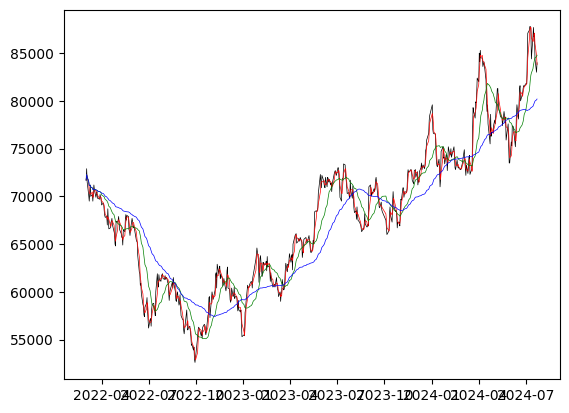

In [134]:
import matplotlib.pyplot as plt

plt.plot(demands, label='actual', linestyle='solid', color='black', linewidth=0.5)
plt.plot(ma3, label='ma3', linestyle='solid', color='red', linewidth=0.5)
plt.plot(ma20, label='ma20', linestyle='solid', color='green', linewidth=0.5)
plt.plot(ma60, label='ma60', linestyle='solid', color='blue', linewidth=0.5)

plt.show()

### 평가

1. MA의 평가방법
오늘 계산 값은 내일의 예측값 (20일 ma 값 -> 21일 act 값과 비교)

2. 지표
https://rfriend.tistory.com/667
MSE, MAE

In [88]:
!pip install scikit-learn

  Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ----------- ---------------------------- 3.1/10.9 MB 208.9 MB/s eta 0:00:01
   ----------- ---------------------------- 3.1/10.9 MB 208.9 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.9 MB 44.9 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.9 MB 44.9 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/10.9 MB 30.9 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/10.9 MB 30.9 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/10.9 MB 30.9 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/10.9 MB 30.9 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/10.9 MB 30.9 MB/s eta 0:00:01
   --------------------

In [109]:

for z in zip(demands[1:].to_list(), ma3[:-1].to_list()):
    print(z)

(55500, 55200.0)
(55500, 55350.0)
(55800, 55400.0)
(56800, 55600.0)
(58600, 56033.333333333336)
(59500, 57066.666666666664)
(60000, 58300.0)
(60000, 59366.666666666664)
(59000, 59833.333333333336)
(60700, 59666.666666666664)
(61300, 59900.0)
(62400, 60333.333333333336)
(61400, 61466.666666666664)
(62300, 61700.0)
(60800, 62033.333333333336)
(58800, 61500.0)
(59100, 60633.333333333336)
(57200, 59566.666666666664)
(56400, 58366.666666666664)
(57200, 57566.666666666664)
(58900, 56933.333333333336)
(59500, 57500.0)
(61100, 58533.333333333336)
(60400, 59833.333333333336)
(59700, 60333.333333333336)
(59900, 60400.0)
(60500, 60000.0)
(60700, 60033.333333333336)
(61800, 60366.666666666664)
(61500, 61000.0)
(59800, 61333.333333333336)
(60200, 61033.333333333336)
(60000, 60500.0)
(59200, 60000.0)
(56800, 59800.0)
(57900, 58666.666666666664)
(56500, 57966.666666666664)
(55900, 57066.666666666664)
(54200, 56766.666666666664)
(55000, 55533.333333333336)
(55400, 55033.333333333336)
(57400, 54866.666

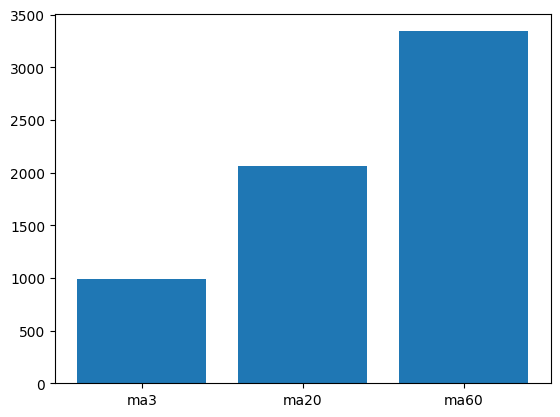

In [122]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# y = [
# MSE(demands[1:].to_list(), ma3[:-1].to_list()),
# MSE(demands[1:].to_list(), ma20[:-1].to_list()),
# MSE(demands[1:].to_list(), ma60[:-1].to_list())]

y2 = [
MAE(demands[1:].to_list(), ma3[:-1].to_list()),
MAE(demands[1:].to_list(), ma20[:-1].to_list()),
MAE(demands[1:].to_list(), ma60[:-1].to_list())]

# plt.bar(['ma3', 'ma20', 'ma60'], y)
plt.bar(['ma3', 'ma20', 'ma60'], y2)
plt.show()